# Modeling: Comparison with Main Competitors

Our main objective is to compare Portuguese attractions with those of the main competitors, in order to identify similarities and possible improvement actions that can be implemented to enhance and improve tourism in Portugal.

We started by importing the file "EuropeTop100Attractions_ENG_20190101_20210821.xlsx" provided by the professor.

In [1]:
import pandas as pd

input_file = "EuropeTop100Attractions_ENG_20190101_20210821.xlsx"

Next, we assign each country its respective monuments using the 'ID' available in sheet_name='Attractions' in the dataset, for clearer visualization.

In [2]:
attractions_data = pd.read_excel(input_file, sheet_name='Attractions')

cleaned_data = pd.read_csv("cleaned_data.csv", sep=';')

filtered_attractions = attractions_data[attractions_data['ID'].isin(cleaned_data['localID'].unique())]

grouped_monuments = filtered_attractions.groupby('Country')['ID'].apply(list)

for country, monuments in grouped_monuments.items():
    print(f"{country} - {', '.join(monuments)}")


France - MAG018, MAG020, MAG044, MAG050, MAG055, MAG057, MAG077, MAG084, MAG087, MAG099
Greece - MAG011, MAG095
Italy - MAG009, MAG025, MAG033, MAG036, MAG038, MAG039, MAG062, MAG064, MAG067, MAG068, MAG074, MAG078, MAG085, MAG086, MAG096, MAG100
Portugal - MAG010, MAG014, MAG021, MAG032, MAG047, MAG049, MAG093
Spain - MAG001, MAG002, MAG004, MAG008, MAG012, MAG015, MAG019, MAG023, MAG030, MAG052, MAG058, MAG059, MAG081, MAG089, MAG094, MAG097, MAG098


We then calculated the review rating average per country by grouping all monuments under their respective countries, to determine which country has the highest ratings.

In [15]:
import pandas as pd

input_file = "EuropeTop100Attractions_ENG_20190101_20210821.xlsx"
attractions_data = pd.read_excel(input_file, sheet_name='Attractions')
cleaned_data = pd.read_csv("cleaned_data.csv", sep=';')

filtered_attractions = attractions_data[attractions_data['ID'].isin(cleaned_data['localID'].unique())]

merged_data = pd.merge(cleaned_data, filtered_attractions[['ID', 'Country']], left_on='localID', right_on='ID', how='inner')

mean_ratings_by_country = merged_data.groupby('Country')['reviewRating'].mean()

for country, rating in mean_ratings_by_country.items():
    print(f"{country} - Review rating average: {rating:.2f}")

France - Review rating average: 4.47
Greece - Review rating average: 4.71
Italy - Review rating average: 4.65
Portugal - Review rating average: 4.44
Spain - Review rating average: 4.61


We can see that the average rating for Portugal is lower compared to competing countries, which means that compared to our competitors, visitors to Portuguese monuments are not as satisfied with the attractions.

Next, we proceeded with a deeper analysis by examining the total number of reviews per monument.

In [5]:
import pandas as pd

data = pd.read_csv('cleaned_data.csv', sep=';')

result = data.groupby('localID')['totalReviews'].first().reset_index()

result = result.sort_values(by='totalReviews', ascending=False)

print(result)

   localID  totalReviews
0   MAG001        163828
1   MAG002         75909
2   MAG004         57180
3   MAG008         42192
4   MAG009         41233
5   MAG010         36979
6   MAG011         35716
7   MAG012         34703
8   MAG014         30707
9   MAG015         28236
10  MAG018         26328
11  MAG019         26042
12  MAG020         25519
13  MAG021         24454
14  MAG023         23293
15  MAG025         22519
16  MAG030         18474
17  MAG032         18392
18  MAG033         18087
19  MAG036         17568
20  MAG038         15795
21  MAG039         15599
22  MAG044         14132
23  MAG047         13342
25  MAG050         10926
24  MAG049         10859
26  MAG052         10556
27  MAG055         10225
28  MAG057          9869
29  MAG058          9624
30  MAG059          9555
31  MAG062          9499
32  MAG064          9244
33  MAG067          8854
34  MAG068          8792
35  MAG074          7898
36  MAG077          7515
37  MAG078          7161
38  MAG081          6887


Next, we analyze the total number of reviews, using a graph

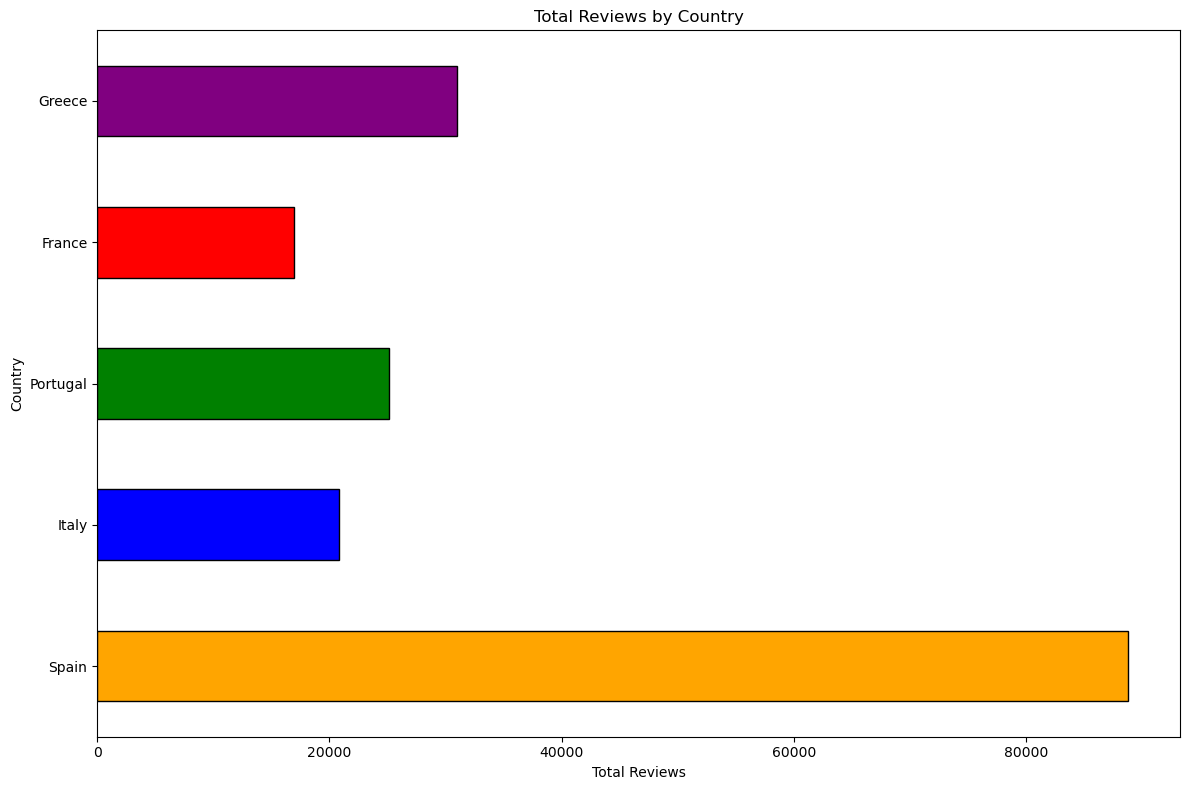

In [8]:
import pandas as pd 
import matplotlib.pyplot as plt

input_file = "EuropeTop100Attractions_ENG_20190101_20210821.xlsx"
attractions_data = pd.read_excel(input_file, sheet_name='Attractions')
cleaned_data = pd.read_csv("cleaned_data.csv", sep=';')

filtered_attractions = attractions_data[attractions_data['ID'].isin(cleaned_data['localID'].unique())]
merged_data = pd.merge(cleaned_data, filtered_attractions[['ID', 'Country']], left_on='localID', right_on='ID', how='inner')

mean_ratings_by_country = merged_data.groupby('Country')['totalReviews'].mean()

custom_palette = {
    'Spain': 'orange',
    'Italy': 'blue',
    'Portugal': 'green',
    'France': 'red',
    'Greece': 'purple'
}

mean_ratings_by_country = mean_ratings_by_country[custom_palette.keys()]

colors = [custom_palette[country] for country in mean_ratings_by_country.index]

plt.figure(figsize=(12, 8))

mean_ratings_by_country.plot(kind='barh', color=colors, edgecolor='black')

plt.title('Total Reviews by Country')
plt.xlabel('Total Reviews')
plt.ylabel('Country')

plt.tight_layout()
plt.show()

We can see that Spain has a significantly higher number of reviews, but considering that we only want to analyze the years 2017, 2018, 2019, 2020, and 2021, we counted the number of reviews per country present in the 'cleaned_data' dataset.

We proceed to the creation of a bar chart to visualize the values obtained.

    Country  Count
0    France   3658
1    Greece   2858
2     Italy   6292
3  Portugal   5287
4     Spain  20525


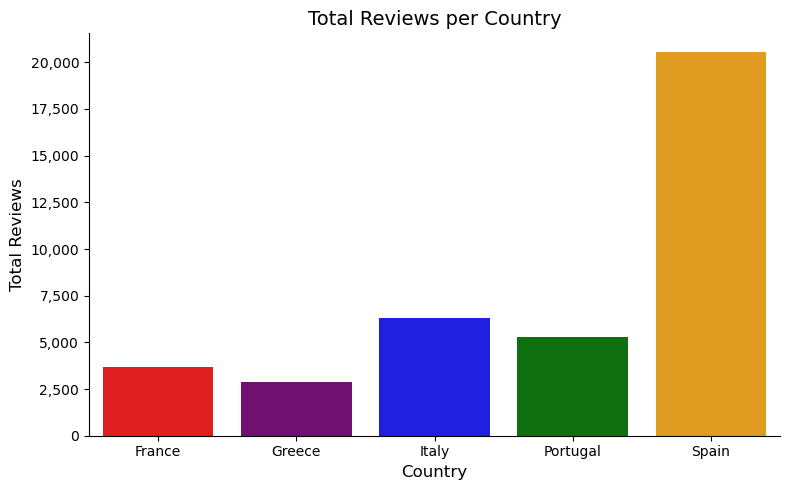

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker

cleaned_data = pd.read_csv("cleaned_data.csv", sep=';')

country_ids = {
    "France": ["MAG018", "MAG020", "MAG044", "MAG050", "MAG055", "MAG057", "MAG077", "MAG084", "MAG087", "MAG099"],
    "Greece": ["MAG011", "MAG095"],
    "Italy": ["MAG009", "MAG025", "MAG033", "MAG036", "MAG038", "MAG039", "MAG062", "MAG064", "MAG067", "MAG068", "MAG074", "MAG078", "MAG085", "MAG086", "MAG096", "MAG100"],
    "Portugal": ["MAG010", "MAG014", "MAG021", "MAG032", "MAG047", "MAG049", "MAG093"],
    "Spain": ["MAG001", "MAG002", "MAG004", "MAG008", "MAG012", "MAG015", "MAG019", "MAG023", "MAG030", "MAG052", "MAG058", "MAG059", "MAG081", "MAG089", "MAG094", "MAG097", "MAG098"]
}

country_counts = []
for country, ids in country_ids.items():
    count = cleaned_data[cleaned_data['localID'].isin(ids)].shape[0]
    country_counts.append(count)

count_table = pd.DataFrame({
    'Country': list(country_ids.keys()),
    'Count': country_counts
})

print(count_table)

custom_palette = {
    'Spain': 'orange',
    'Italy': 'blue',
    'Portugal': 'green',
    'France': 'red',
    'Greece': 'purple'
}

plots_Title_fontSize = 14
subPlots_label_fontSize = 12

fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(
    data=count_table,
    x='Country',
    y='Count',
    hue='Country', 
    dodge=False,  
    palette=custom_palette,
    ax=ax
)

fmt = "{x:,.0f}"  
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

sns.despine()  
plt.title("Total Reviews per Country", fontsize=plots_Title_fontSize)
plt.xlabel("Country", fontsize=subPlots_label_fontSize)
plt.ylabel("Total Reviews", fontsize=subPlots_label_fontSize)

plt.tight_layout()  
plt.show()


We can see that Spain shows a significant discrepancy in the total number of reviews compared to the other countries, ranking first, followed by Italy and Portugal in third place. This chart clearly demonstrates that Spain is our main competitor, considering that it is our neighboring country and has nearly four times our total reviews. These values also highlight a positive aspect, presenting a market potential opportunity since a significant number of people visit Spain, and we are culturally similar to them.

We continue to compare Portuguese attractions with the main tourism competitors, Spain, Italy, France, and Greece, and analyzed the total reviews and the average rating of each country using a scatter plot.

    Country  reviewRating  Total Reviews
0    France      4.465555           3658
1    Greece      4.706088           2858
2     Italy      4.649396           6292
3  Portugal      4.437488           5287
4     Spain      4.605213          20525


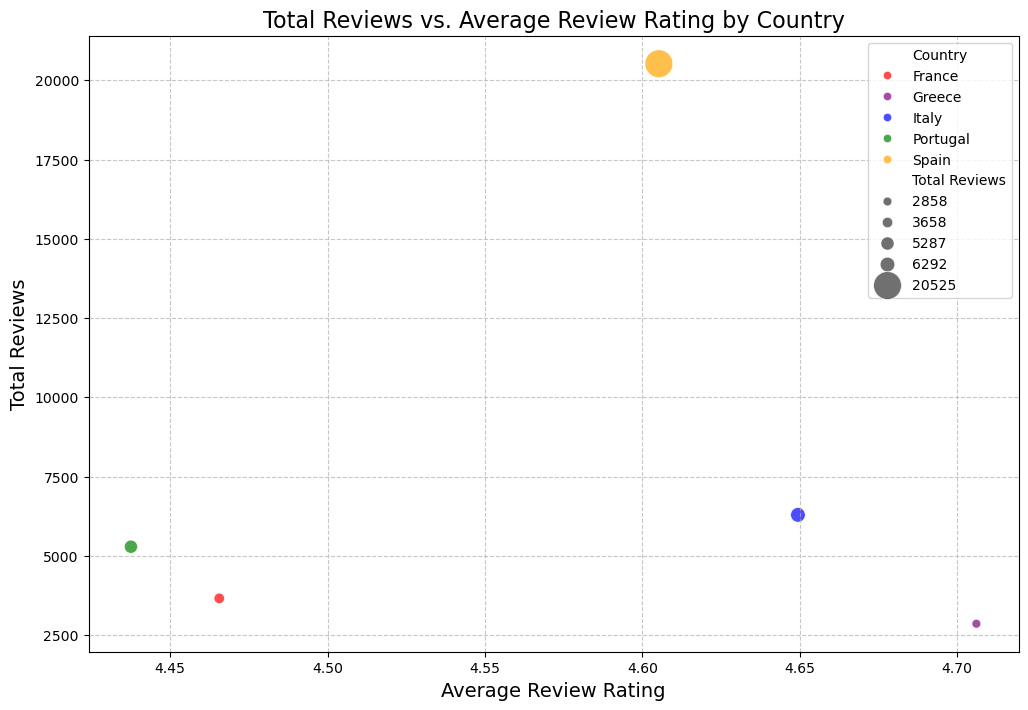

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

input_file = "EuropeTop100Attractions_ENG_20190101_20210821.xlsx"
attractions_data = pd.read_excel(input_file, sheet_name='Attractions')
cleaned_data = pd.read_csv("cleaned_data.csv", sep=';')

filtered_attractions = attractions_data[attractions_data['ID'].isin(cleaned_data['localID'].unique())]
merged_data = pd.merge(cleaned_data, filtered_attractions[['ID', 'Country']], left_on='localID', right_on='ID', how='inner')

ratings_summary_by_country = merged_data.groupby('Country').agg(
    reviewRating=('reviewRating', 'mean'),
    totalReviews=('reviewRating', 'size')
).reset_index()

ratings_summary_by_country.rename(columns={'totalReviews': 'Total Reviews'}, inplace=True)

print(ratings_summary_by_country)

custom_palette = {
    'Spain': 'orange',
    'Italy': 'blue',
    'Portugal': 'green',
    'France': 'red',
    'Greece': 'purple'
}

plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(
    data=ratings_summary_by_country,
    x='reviewRating',
    y='Total Reviews',  
    size='Total Reviews',
    sizes=(40, 400),
    alpha=0.7,
    hue='Country', 
    palette=custom_palette 
)

plt.title('Total Reviews vs. Average Review Rating by Country', fontsize=16)
plt.xlabel('Average Review Rating', fontsize=14)
plt.ylabel('Total Reviews', fontsize=14)
plt.grid(axis='both', linestyle='--', alpha=0.7)

plt.show()

We evaluated the average "reviewRating" for each monument.

In [39]:
import pandas as pd

df = pd.read_csv('cleaned_data.csv', sep=';')

df = df.dropna(subset=['reviewRating'])

df['monument'] = df['localID'].apply(lambda x: str(x).split('-')[0])

unique_monuments = df['monument'].nunique()
print(f"Total unique monuments: {unique_monuments}")

mean_ratings = df.groupby('monument')['reviewRating'].mean().reset_index()

for _, row in mean_ratings.iterrows():
    print(f"{row['monument']} - Reviews rating average: {row['reviewRating']:.2f}")

Total unique monuments: 52
MAG001 - Reviews rating average: 4.76
MAG002 - Reviews rating average: 4.07
MAG004 - Reviews rating average: 4.43
MAG008 - Reviews rating average: 4.68
MAG009 - Reviews rating average: 4.72
MAG010 - Reviews rating average: 4.23
MAG011 - Reviews rating average: 4.71
MAG012 - Reviews rating average: 4.66
MAG014 - Reviews rating average: 4.44
MAG015 - Reviews rating average: 4.84
MAG018 - Reviews rating average: 4.10
MAG019 - Reviews rating average: 4.63
MAG020 - Reviews rating average: 4.56
MAG021 - Reviews rating average: 4.70
MAG023 - Reviews rating average: 4.53
MAG025 - Reviews rating average: 4.64
MAG030 - Reviews rating average: 4.76
MAG032 - Reviews rating average: 4.20
MAG033 - Reviews rating average: 4.43
MAG036 - Reviews rating average: 4.72
MAG038 - Reviews rating average: 4.96
MAG039 - Reviews rating average: 4.80
MAG044 - Reviews rating average: 4.58
MAG047 - Reviews rating average: 4.79
MAG049 - Reviews rating average: 4.59
MAG050 - Reviews rating

Next, identify the 10 monuments with the highest ratings.

In [40]:
import pandas as pd

input_file = "EuropeTop100Attractions_ENG_20190101_20210821.xlsx"
attractions_data = pd.read_excel(input_file, sheet_name='Attractions')

cleaned_data = pd.read_csv("cleaned_data.csv", sep=';')

filtered_attractions = attractions_data[attractions_data['ID'].isin(cleaned_data['localID'].unique())]

mean_ratings = mean_ratings.merge(filtered_attractions[['ID', 'Country', 'Name']], 
                                  left_on='monument', right_on='ID', how='left')

mean_ratings['reviewRating'] = mean_ratings['reviewRating'].astype(float)

top_10_monuments = mean_ratings.nlargest(10, 'reviewRating')

print("\nTop 10 monuments with the highest evaluation:")
for _, row in top_10_monuments.iterrows():
    print(f"{row['monument']} {row['Name']} ({row['Country']}) - Reviews rating average: {row['reviewRating']:.2f}")


Top 10 monuments with the highest evaluation:
MAG038 Sassi di Matera (Italy) - Reviews rating average: 4.96
MAG081 Catedral De Burgos (Spain) - Reviews rating average: 4.93
MAG058 Acueduct of Segovia (Spain) - Reviews rating average: 4.85
MAG067 Basilica Papale e Sacro Convento... (Italy) - Reviews rating average: 4.84
MAG015 Mezquita Cathedral de Cordoba (Spain) - Reviews rating average: 4.84
MAG039 Ortigia (Italy) - Reviews rating average: 4.80
MAG047 Quinta da Regaleira (Portugal) - Reviews rating average: 4.79
MAG074 Parco Acheologico di Ercolano (Italy) - Reviews rating average: 4.77
MAG077 Cathedrale Notre-Dame de Reims (France) - Reviews rating average: 4.77
MAG030 Palace of Catalan Music (Spain) - Reviews rating average: 4.76


To visualize the data obtained earlier, we generated a bar chart to identify which monuments received the highest ratings.

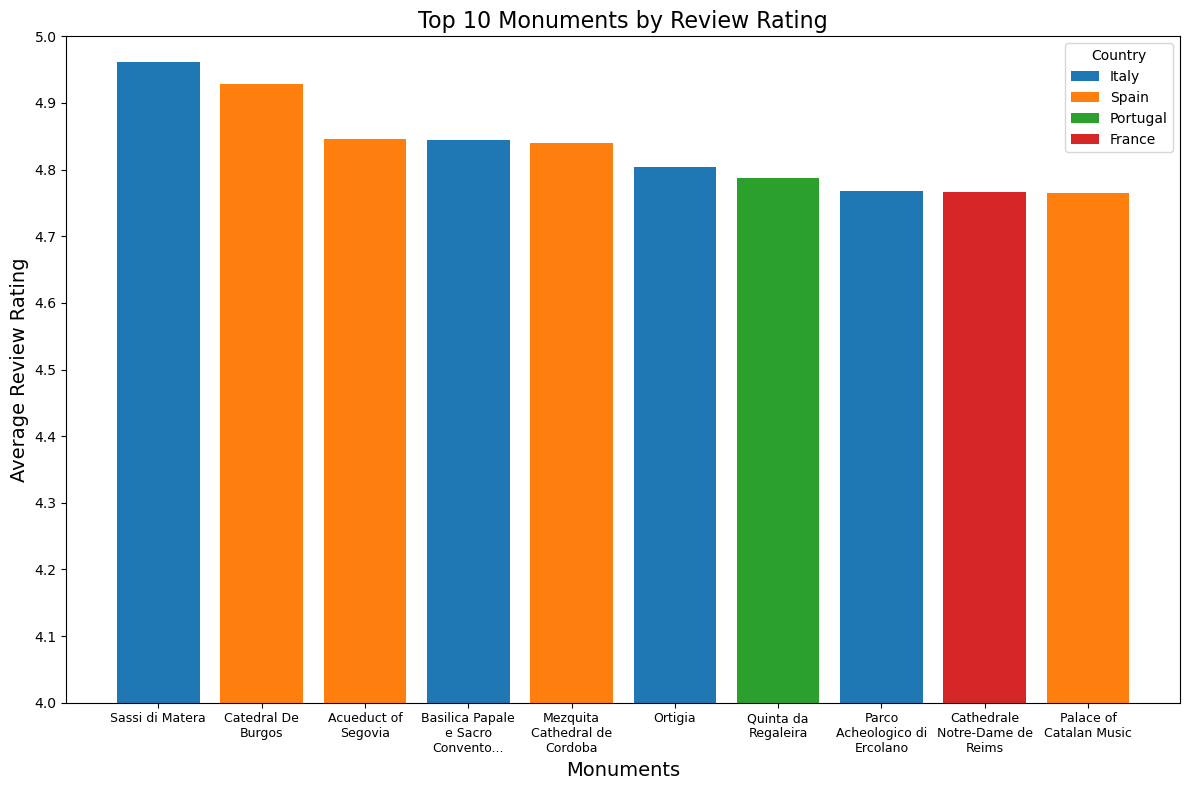

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import textwrap  

unique_countries = top_10_monuments['Country'].unique()
color_palette = sns.color_palette("tab10", len(unique_countries))
country_color_map = dict(zip(unique_countries, color_palette))

top_10_monuments['color'] = top_10_monuments['Country'].map(country_color_map)

line_limit = 15  
top_10_monuments['formatted_name'] = top_10_monuments['Name'].apply(
    lambda x: '\n'.join(textwrap.wrap(x, line_limit)) 
)

plt.figure(figsize=(12, 8))
plt.bar(
    top_10_monuments['formatted_name'],  
    top_10_monuments['reviewRating'], 
    color=top_10_monuments['color']
)

plt.xlabel("Monuments", fontsize=14)
plt.ylabel("Average Review Rating", fontsize=14)
plt.title("Top 10 Monuments by Review Rating", fontsize=16)

plt.xticks(rotation=0, ha='center', fontsize=9)

plt.ylim(4, 5)
plt.yticks([i / 10 for i in range(40, 51)])

for country, color in country_color_map.items():
    plt.bar(0, 0, color=color, label=country) 
plt.legend(title="Country")

plt.tight_layout()
plt.show()

We can see that only one monument in Portugal, Quinta da Regaleira, is among the 10 monuments with the highest ratings, while our main competitors, Spain and Italy, have 4 each. This result shows that tourism in Portugal has room for growth, and we can proceed to analyze the strategies of our competitors to understand what they are doing to achieve these superior results.